In [1]:
import sys
sys.path.append("/home/hyunho/sfda/")

In [2]:
from dataset.gta_loader import SegmentationDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
import numpy as np

### Cityscapes 확인

In [3]:
from dataset.cityscapes_loader import CityscapesDataset
image_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Add normalization if needed
])

# For the mask, we only need to resize and convert it to tensor
mask_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.Lambda(lambda x: torch.from_numpy(np.array(x, dtype=np.int64)))
])

debug_dataset = CityscapesDataset(
  images_dir="/home/hyunho/sfda/data/cityscapes_dataset/leftImg8bit/train",
  masks_dir="/home/hyunho/sfda/data/cityscapes_dataset/gtFine/train",
  transform = image_transforms,
  target_transform = mask_transforms,
  debug=True
)

debug_dataloader = DataLoader(
  debug_dataset, batch_size=1, shuffle=True, num_workers=4
)

data = next(iter(debug_dataloader))

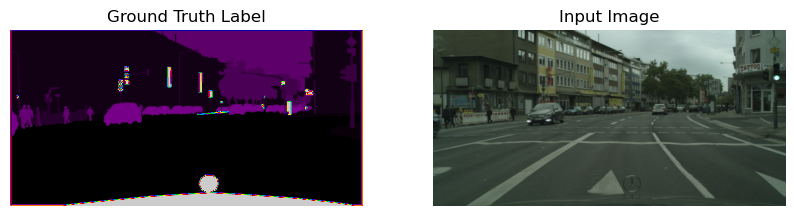

In [4]:
import matplotlib.pyplot as plt
image, label = data
label_image = label[0].cpu().numpy()
input_img = image[0].permute(1, 2, 0).cpu().numpy()


plt.figure(figsize=(10, 5))

# Ground truth label
plt.subplot(1, 2, 1)
plt.imshow(label_image,  cmap='nipy_spectral')
plt.title('Ground Truth Label')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_img)
plt.title('Input Image')
plt.axis('off')

plt.savefig(f"/home/hyunho/sfda/_example/image/cityscapes.png")

### GTA5 dataset 확인

In [5]:
image_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Add normalization if needed
])

# For the mask, we only need to resize and convert it to tensor
mask_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.Lambda(lambda x: torch.from_numpy(np.array(x, dtype=np.int64)))
])

train_dataset = SegmentationDataset(
    images_dir="/home/hyunho/sfda/data/gta5_dataset/images",
    masks_dir="/home/hyunho/sfda/data/gta5_dataset/labels",
    transform=image_transforms,
    target_transform=mask_transforms
)

train_loader = DataLoader(
    train_dataset, batch_size=1, shuffle=True, num_workers=4
)

data = next(iter(train_loader))

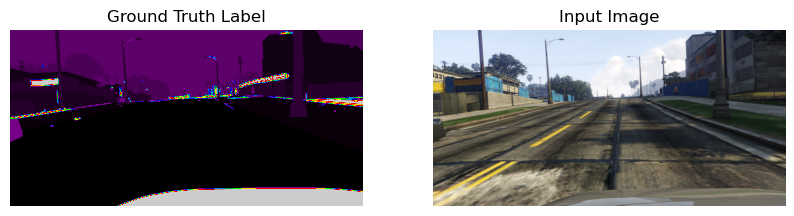

In [6]:
import matplotlib.pyplot as plt
image, label = data
label_image = label[0].cpu().numpy()
input_img = image[0].permute(1, 2, 0).cpu().numpy()


plt.figure(figsize=(10, 5))

# Ground truth label
plt.subplot(1, 2, 1)
plt.imshow(label_image,  cmap='nipy_spectral')
plt.title('Ground Truth Label')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_img)
plt.title('Input Image')
plt.axis('off')

plt.savefig(f"/home/hyunho/sfda/_example/image/cityscapes.png")